In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-20 16:47:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.005s  

2025-10-20 16:47:21 (14.0 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('course_lead_scoring.csv')

In [5]:
df.shape

(1462, 9)

In [6]:
df.isnull().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [7]:
df.dtypes

,0
lead_source,object
industry,object
number_of_courses_viewed,int64
annual_income,float64
employment_status,object
location,object
interaction_count,int64
lead_score,float64
converted,int64


In [8]:
df['lead_source']=df['lead_source'].fillna('NA')

In [9]:
df['industry']=df['industry'].fillna('NA')
df['annual_income']=df['annual_income'].fillna(0)
df['employment_status']=df['employment_status'].fillna('NA')
df['location']=df['location'].fillna('NA')

In [10]:
df.isnull().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,0
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


In [11]:
df.dtypes

,0
lead_source,object
industry,object
number_of_courses_viewed,int64
annual_income,float64
employment_status,object
location,object
interaction_count,int64
lead_score,float64
converted,int64


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

In [15]:
print((df_train.shape,df_val.shape),df_test.shape)

((935, 9), (234, 9)) (293, 9)


In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
dv = DictVectorizer(sparse=False)

In [18]:
x_train = df_train.drop(columns=['converted'],axis=1)

In [19]:
y_train = df_train['converted']

In [20]:
x_train.shape,y_train.shape

((935, 8), (935,))

In [21]:
train_dicts = x_train.to_dict(orient='records')

In [22]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [23]:
X_train = dv.transform(train_dicts)

In [24]:
df_train_new = pd.DataFrame(X_train, columns=dv.get_feature_names_out())

In [25]:
df_train_new

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,61657.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
1,68420.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,41483.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,59904.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61639.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,67314.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
931,63996.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
932,73702.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
933,93341.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
from sklearn.metrics import *

In [27]:
roc_auc_score(y_train,df_train_new['annual_income'])

np.float64(0.5523787272567974)

In [28]:
roc_auc_score(y_train,df_train_new['number_of_courses_viewed'])

np.float64(0.7656440135120665)

In [29]:
roc_auc_score(y_train,df_train_new['interaction_count'])

np.float64(0.7309025242642835)

In [30]:
roc_auc_score(y_train,df_train_new['lead_score'])

np.float64(0.6077412069351558)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
ls = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [33]:
ls.fit(df_train_new,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [34]:
y_val = ls.predict(df_train_new)
y_pred = ls.predict_proba(df_train_new)[:,1]

In [35]:
converted = (y_pred>=0.5)
score = (y_train==converted).mean()
score

np.float64(0.73475935828877)

In [36]:
thresh = np.linspace(0,1,21)

for t in thresh:
  converted = (y_pred>=t)
  score = (y_train==converted).mean()
  print(t,score)

0.0 0.6224598930481283
0.05 0.6224598930481283
0.1 0.6224598930481283
0.15000000000000002 0.6224598930481283
0.2 0.6224598930481283
0.25 0.6320855614973262
0.30000000000000004 0.6417112299465241
0.35000000000000003 0.6684491978609626
0.4 0.6898395721925134
0.45 0.720855614973262
0.5 0.73475935828877
0.55 0.772192513368984
0.6000000000000001 0.7711229946524064
0.65 0.7390374331550802
0.7000000000000001 0.706951871657754
0.75 0.6684491978609626
0.8 0.5989304812834224
0.8500000000000001 0.5240641711229946
0.9 0.46310160427807484
0.9500000000000001 0.4
1.0 0.3775401069518717


In [37]:
accuracy_score(y_val,y_train)

0.73475935828877

In [38]:
y_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [39]:
x_val = df_val.drop(columns=['converted'],axis=1)
y_val_val = df_val['converted']

In [40]:
val_dicts = x_val.to_dict(orient='records')

In [41]:
X_val = dv.transform(val_dicts)

In [42]:
df_val_new = pd.DataFrame(X_val, columns=dv.get_feature_names_out())

In [43]:
y_v = ls.predict_proba(df_val_new)[:,1]

In [44]:
y_v.shape

(234,)

In [45]:
y_pred_val = ls.predict(df_val_new)

In [46]:
y_pred_val.shape

(234,)

In [47]:
roc_auc_score(y_val_val,y_v)

np.float64(0.8060745924216483)

In [48]:
roc_auc_score(y_train,y_pred)

np.float64(0.8338395490785899)

In [49]:
accuracy_score(y_val_val,y_pred_val)

0.6965811965811965

In [50]:
actual_positive = (y_pred_val==1)
actual_negative = (y_pred_val==0)


In [51]:
scores = []

for t in np.arange(0,1,0.01):
  actual_positive = (y_pred_val==1)
  actual_negative = (y_pred_val==0)
  predicted_positive = (y_v >= t)
  predicted_negative = (y_v < t)

  tp = (actual_positive & predicted_positive).sum()
  fp = (actual_negative & predicted_positive).sum()
  fn = (actual_positive & predicted_negative).sum()
  tn = (actual_negative & predicted_negative).sum()

  scores.append((t,tp,fp,fn,tn))

In [52]:
df_score = pd.DataFrame(scores,columns=['threshold','tp','fp','fn','tn'])

In [53]:
df_score[df_score['threshold']==0.8]

,threshold,tp,fp,fn,tn
80,0.8,54,0,136,44


In [54]:
df_score

,threshold,tp,fp,fn,tn
0,0.00,190,44,0,0
1,0.01,190,44,0,0
2,0.02,190,44,0,0
3,0.03,190,44,0,0
4,0.04,190,44,0,0
...,...,...,...,...,...
95,0.95,4,0,186,44
96,0.96,3,0,187,44
97,0.97,1,0,189,44
98,0.98,0,0,190,44


In [55]:
df_score['fpr'] = df_score['fp']/(df_score['fp'] + df_score['tn'])
df_score['tpr'] = df_score['tp']/(df_score['tp'] + df_score['fn'])

In [56]:
df_score

,threshold,tp,fp,fn,tn,fpr,tpr
0,0.00,190,44,0,0,1.0,1.000000
1,0.01,190,44,0,0,1.0,1.000000
2,0.02,190,44,0,0,1.0,1.000000
3,0.03,190,44,0,0,1.0,1.000000
4,0.04,190,44,0,0,1.0,1.000000
...,...,...,...,...,...,...,...
95,0.95,4,0,186,44,0.0,0.021053
96,0.96,3,0,187,44,0.0,0.015789
97,0.97,1,0,189,44,0.0,0.005263
98,0.98,0,0,190,44,0.0,0.000000


In [57]:
auc(df_score['fpr'],df_score['tpr'])

np.float64(1.0)

In [58]:
df_score['precision'] = df_score['tp']/(df_score['tp'] + df_score['fp'])
df_score['recall'] = df_score['tp']/(df_score['tp'] + df_score['fn'])

In [59]:
df_score

,threshold,tp,fp,fn,tn,fpr,tpr,precision,recall
0,0.00,190,44,0,0,1.0,1.000000,0.811966,1.000000
1,0.01,190,44,0,0,1.0,1.000000,0.811966,1.000000
2,0.02,190,44,0,0,1.0,1.000000,0.811966,1.000000
3,0.03,190,44,0,0,1.0,1.000000,0.811966,1.000000
4,0.04,190,44,0,0,1.0,1.000000,0.811966,1.000000
...,...,...,...,...,...,...,...,...,...
95,0.95,4,0,186,44,0.0,0.021053,1.000000,0.021053
96,0.96,3,0,187,44,0.0,0.015789,1.000000,0.015789
97,0.97,1,0,189,44,0.0,0.005263,1.000000,0.005263
98,0.98,0,0,190,44,0.0,0.000000,NaN,0.000000


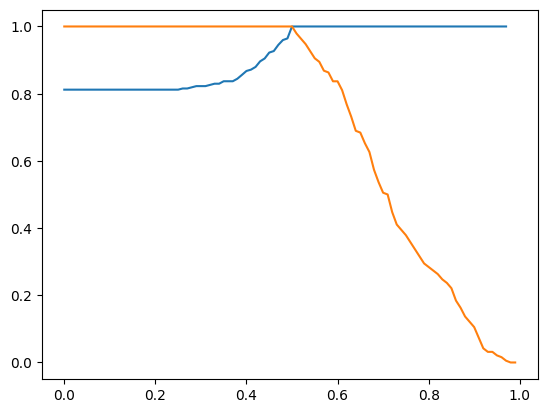

In [60]:
plt.plot(df_score['threshold'],df_score['precision'])
plt.plot(df_score['threshold'],df_score['recall'])
plt.show()

In [61]:
df_score[df_score['threshold']==0.5]

,threshold,tp,fp,fn,tn,fpr,tpr,precision,recall
50,0.5,190,0,0,44,0.0,1.0,1.0,1.0


In [62]:
df_score['f1'] = 2*df_score['precision']*df_score['recall']/(df_score['precision']+df_score['recall'])

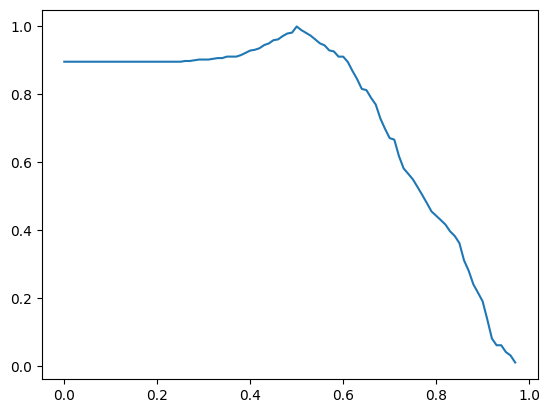

In [63]:
plt.plot(df_score['threshold'],df_score['f1'])
plt.show()

In [64]:
df_score[df_score['f1']==df_score['f1'].max()]

,threshold,tp,fp,fn,tn,fpr,tpr,precision,recall,f1
50,0.5,190,0,0,44,0.0,1.0,1.0,1.0,1.0


In [88]:
def train(df_train,y_train,C=1.0):
  dicts = df_train.to_dict(orient='records')
  dv = DictVectorizer(sparse=False)
  dv.fit(dicts)
  X_train = dv.transform(dicts)
  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
  model.fit(X_train,y_train)
  return dv,model



In [87]:
dv,model = train(x_train,y_train,C)

NameError: name 'C' is not defined

In [89]:
def predict(df,dv,model):
  dicts = df.to_dict(orient='records')
  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]
  return y_pred

In [68]:
from sklearn.model_selection import KFold

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [70]:
train_idx,val_idx = next(kfold.split(df_full_train))

In [71]:
len(train_idx),len(val_idx)

(935, 234)

In [90]:
for c in [0.000001, 0.001, 1]:
  scores = []
  for train_idx,val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['converted']
    y_val = df_val['converted']
    df_train = df_train.drop(columns=['converted'],axis=1)
    df_val = df_val.drop(columns=['converted'],axis=1)

    dv,model = train(df_train,y_train,C=c)
    y_pred = predict(df_val,dv,model)

    auc = roc_auc_score(y_val,y_pred)
    scores.append(auc)
  print(c,np.mean(scores))


1e-06 0.560207852870275
0.001 0.8668780317675395
1 0.8221089148573075


In [81]:
np.std(scores)

np.float64(0.03580711942905165)